In [1]:
from sklearn.datasets import make_regression
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [2]:
X,y=make_regression(n_samples=100,n_features=1,n_targets=1,n_informative=1,noise=20)

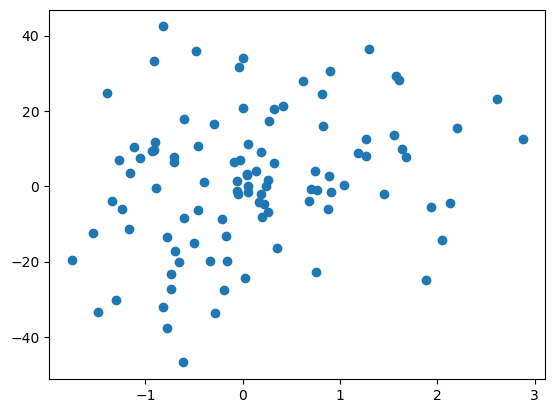

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr=LinearRegression()

In [6]:
lr.fit(X,y)

LinearRegression()

In [7]:
lr.coef_

array([4.76421466])

In [8]:
lr.intercept_

0.7077444660096266

In [9]:
np.mean(cross_val_score(lr,X,y,scoring='r2',cv=10))

-0.032360503614672395

In [10]:
m=13.77

In [11]:
class GDRegressor:
    
    def __init__(self,learning_rate,ephocs):
        self.m=100
        self.b=-120
        self.lr=learning_rate
        self.ephocs=ephocs
        
    def fit(self,X,y):
        #calculate b using gradient descent 
        
        for i in range (self.ephocs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            self.b = self.b - (self.lr * loss_slope_b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            self.m=self.m - (self.lr * loss_slope_m)
            
        print(self.m,self.b)   
        
    def predict(self,X):
        return self.m * X + self.b

In [12]:
gd=GDRegressor(0.001,50)

In [13]:
gd.fit(X,y)

4.768757740231058 0.7025200851833169


In [14]:
gd.predict(X)

array([[-3.18710695],
       [-1.47541311],
       [ 1.50862458],
       [ 0.96637403],
       [ 1.74305085],
       [-3.52117805],
       [ 0.95652919],
       [-0.72058919],
       [-6.38488865],
       [ 6.72974183],
       [-2.1810934 ],
       [-5.69445364],
       [ 1.6530944 ],
       [-5.21706769],
       [-2.80828277],
       [-2.41903101],
       [ 8.10880105],
       [ 2.21346987],
       [ 3.634159  ],
       [ 1.95337139],
       [-2.65892229],
       [-7.67656824],
       [ 1.92486053],
       [14.40943635],
       [ 4.2807385 ],
       [10.48487888],
       [ 0.92341065],
       [ 9.9472314 ],
       [-0.11179256],
       [13.17267189],
       [ 4.8922801 ],
       [-6.62505112],
       [ 0.69551526],
       [ 4.98768544],
       [ 0.48704917],
       [-1.46887689],
       [-3.62504951],
       [10.86384867],
       [ 0.80517037],
       [-1.18086656],
       [ 4.59919194],
       [ 4.61834009],
       [-2.65531999],
       [ 1.99416354],
       [ 8.23211234],
       [-2

In [15]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [16]:
b = -520
m = 600
lr = 0.001
all_b = []
all_m = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(X.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * X[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * X[j]) -  b)*X[j]
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

<IPython.core.display.Javascript object>


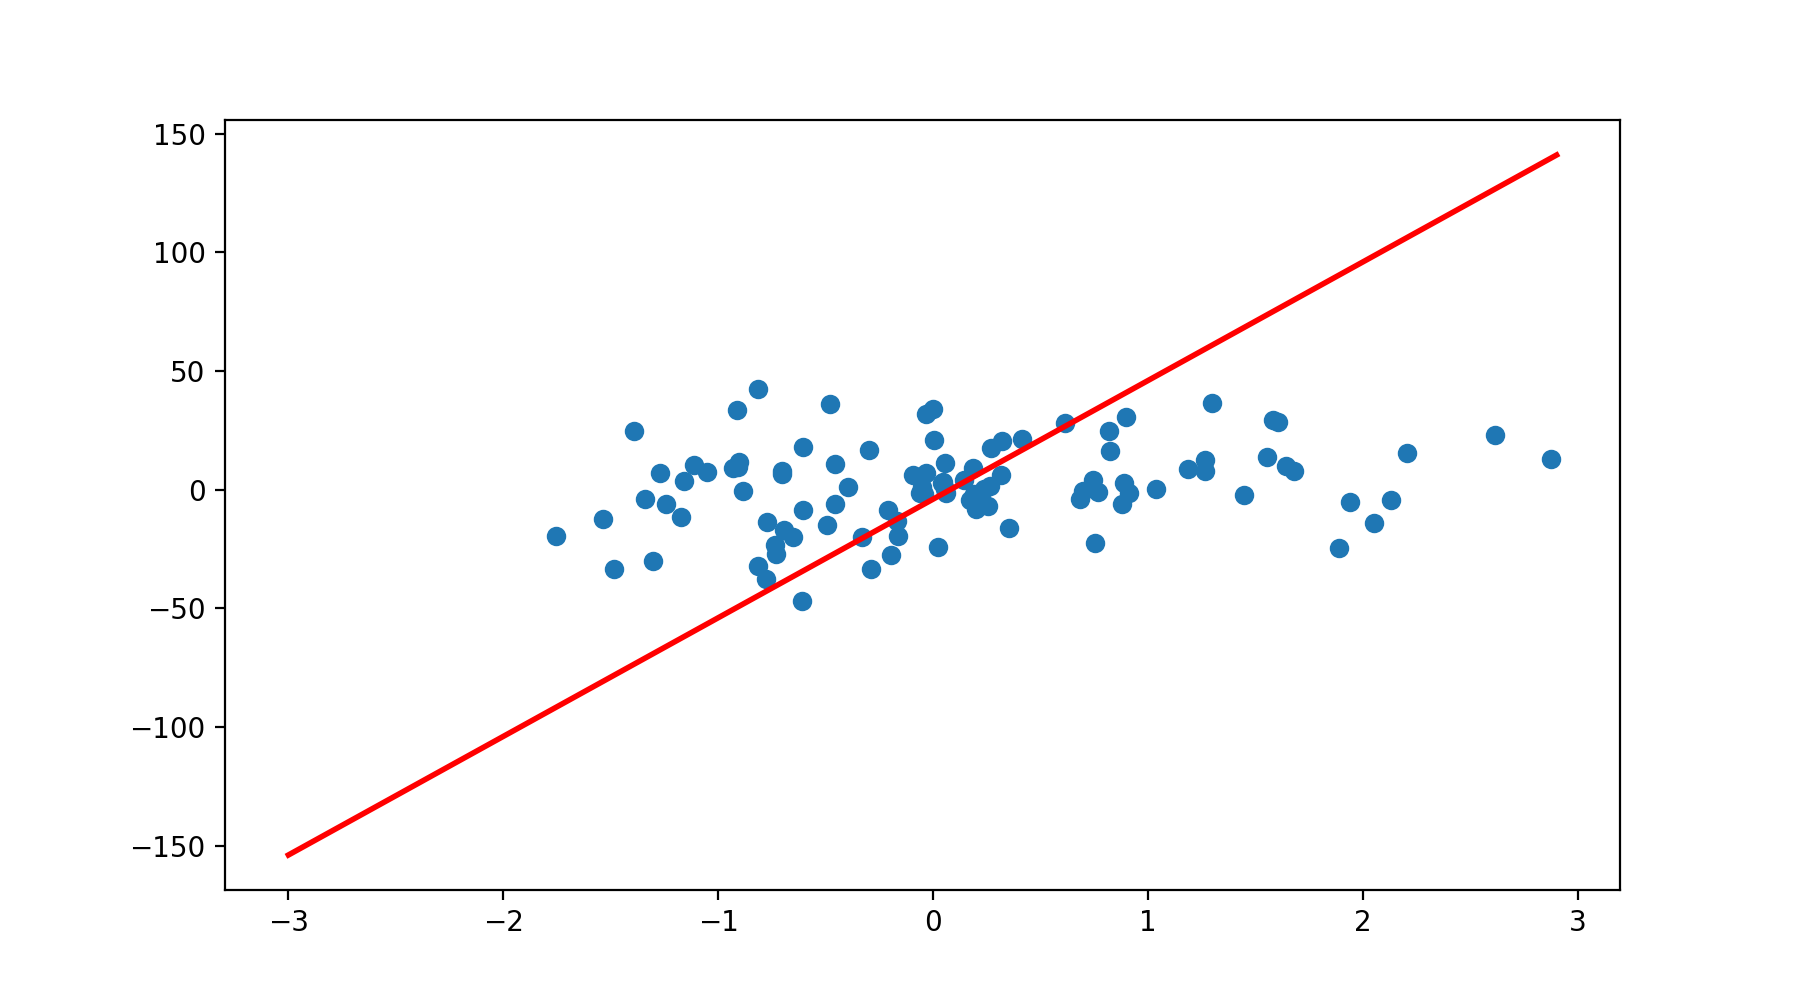

In [17]:
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)

#f = r"animation4.gif" 
#writergif = animation.PillowWriter(fps=2) 
#anim.save(f, writer=writergif)

<IPython.core.display.Javascript object>


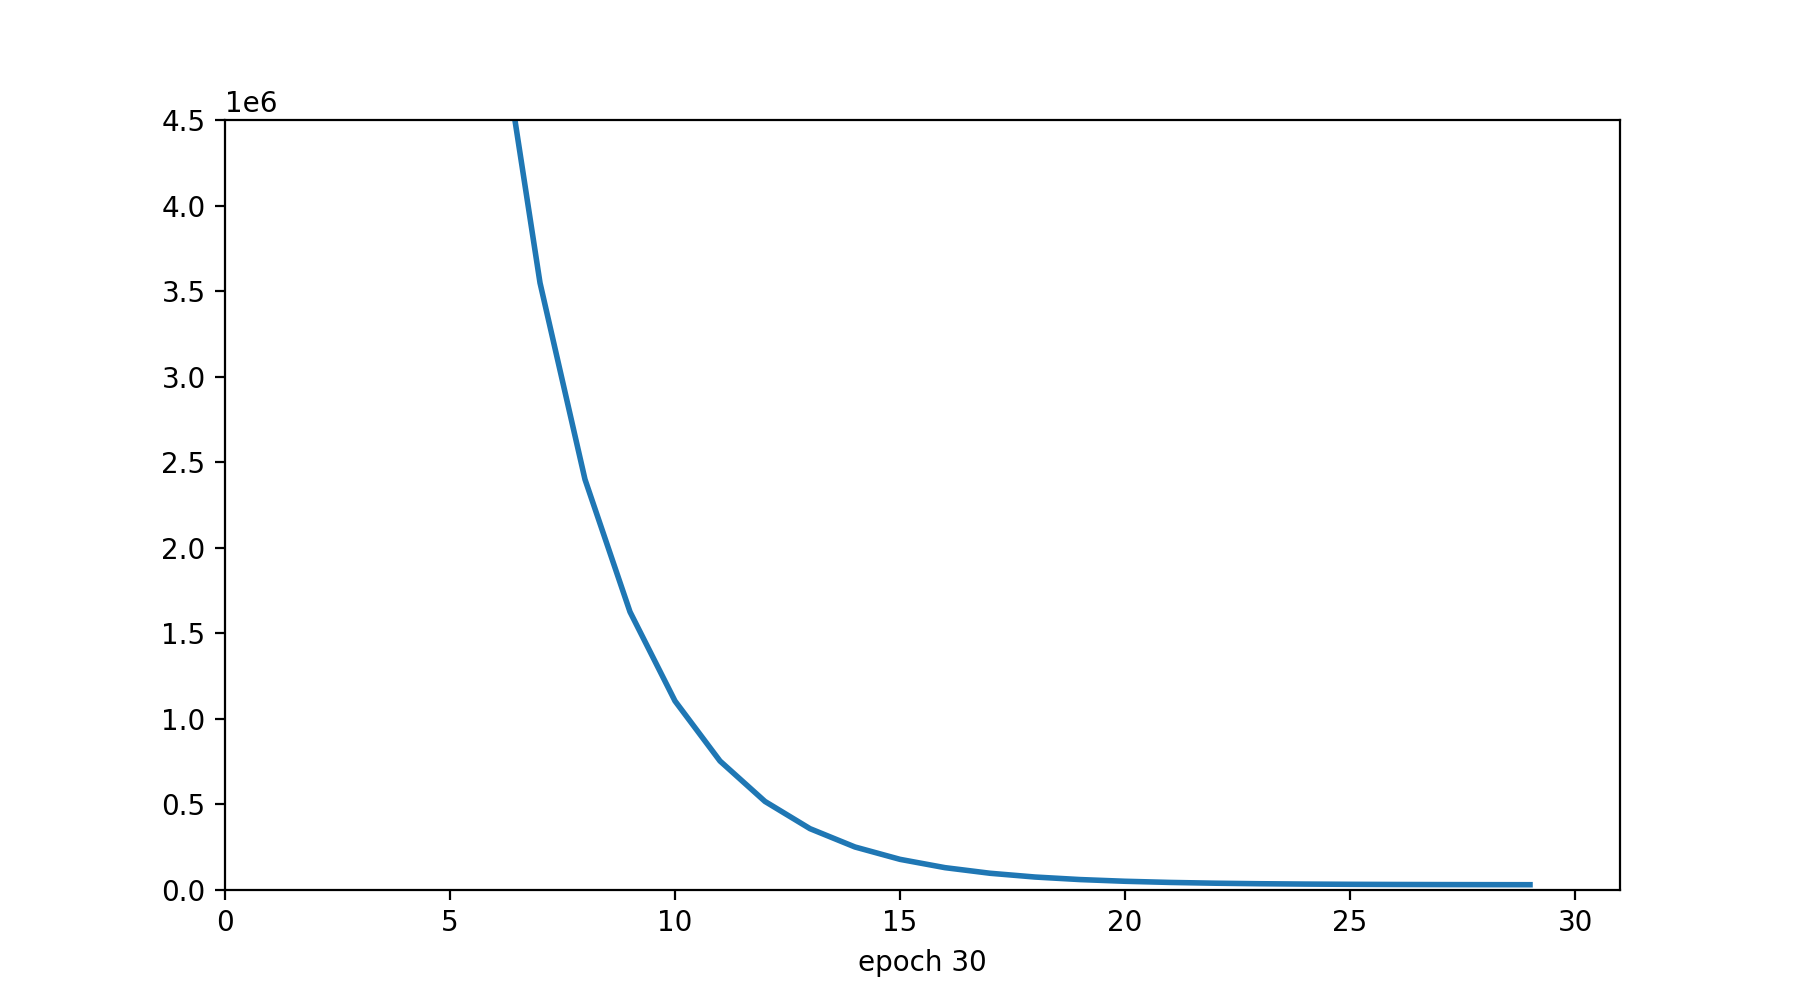

/Users/nikhil/anaconda3/lib/python3.11/site-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [18]:
# Cost function
# creating a blank window 
# for the animation 
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(0, 31), ylim =(0, 4500000)) 
  
line, = axis.plot([], [], lw = 2) 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i]) 
    ydata.append(all_cost[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation5.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)


<IPython.core.display.Javascript object>


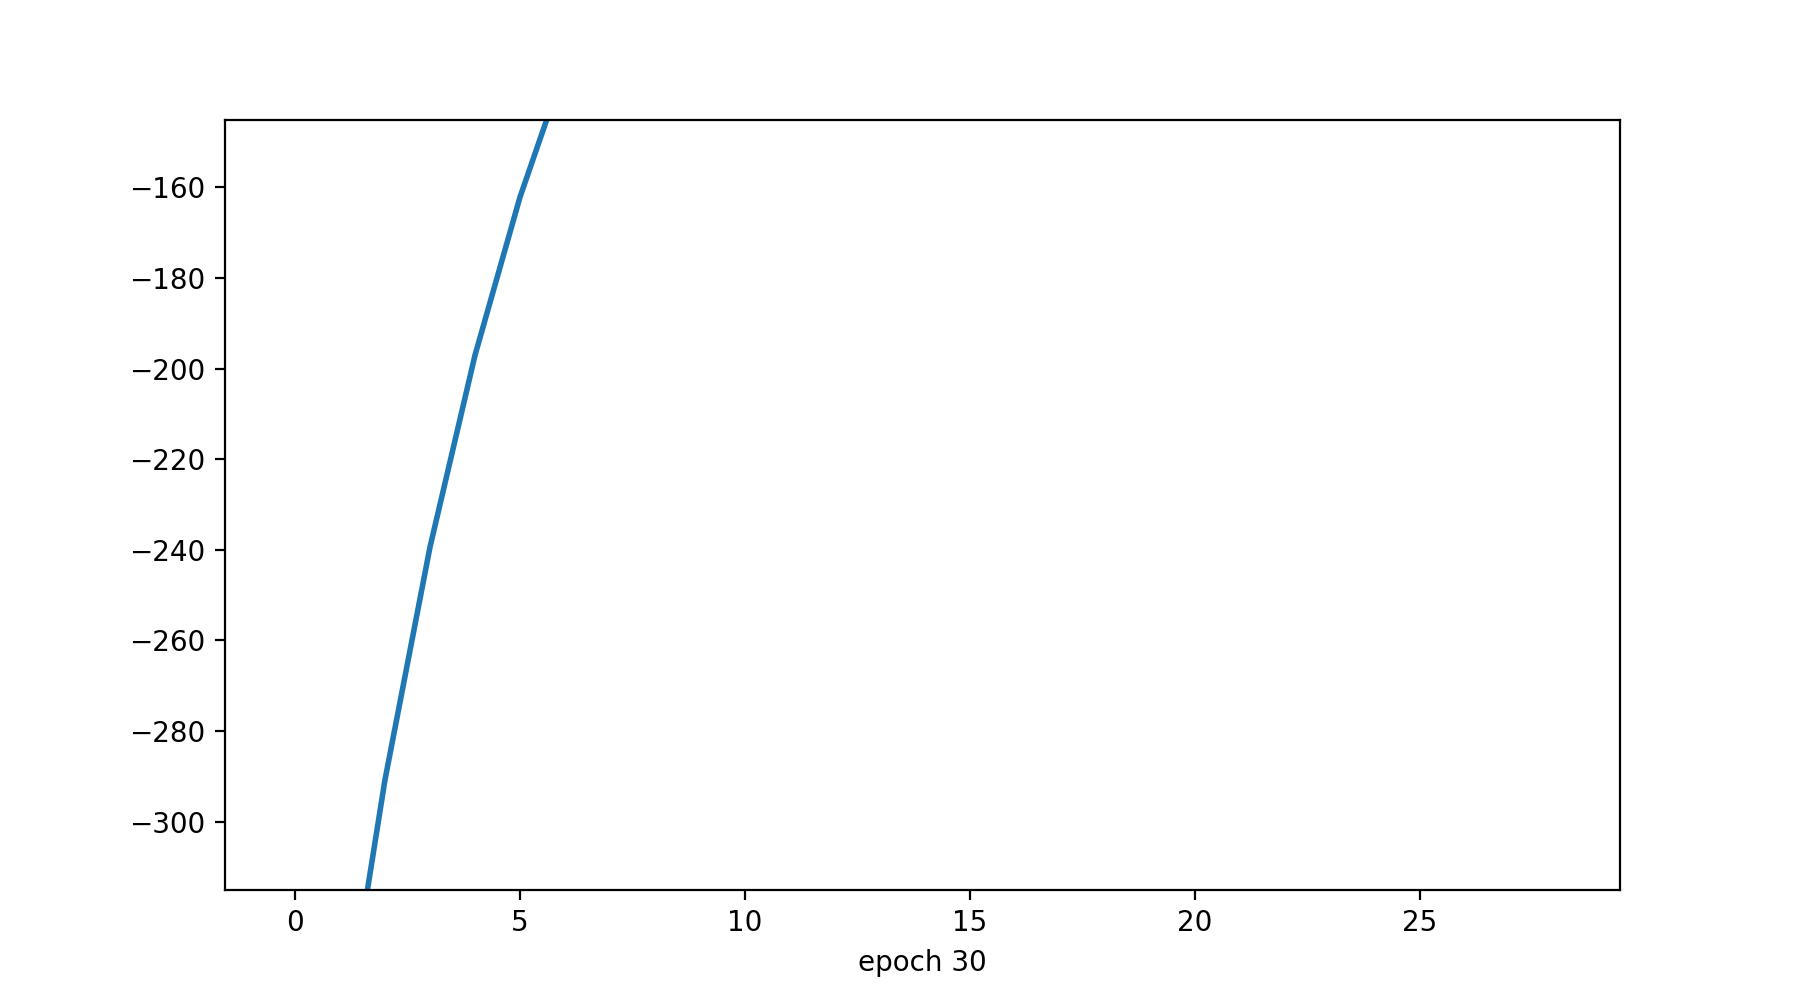

In [19]:
# intercept graph
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(0, 31), ylim =(-10, 160)) 
  
line, = axis.plot([], [], lw = 2) 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i]) 
    ydata.append(all_b[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation6.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

<IPython.core.display.Javascript object>


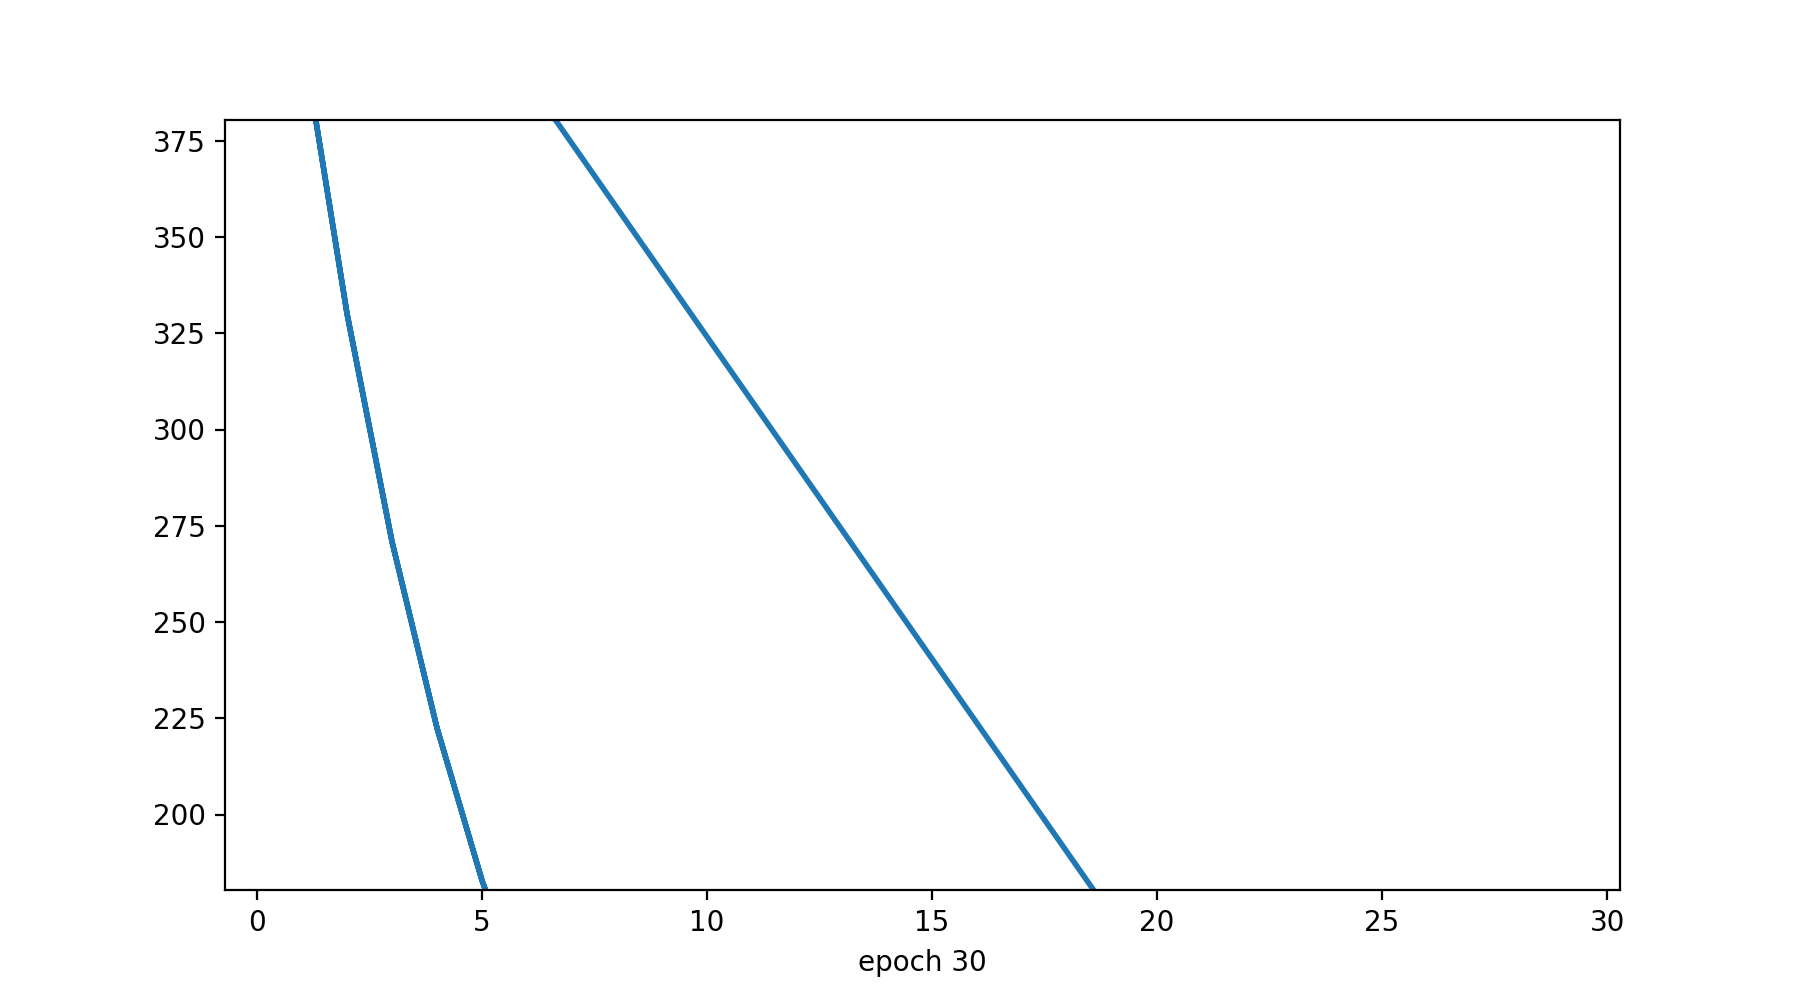

In [20]:
# intercept graph
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(0, 31), ylim =(-150, 50)) 
  
line, = axis.plot([], [], lw = 2) 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i]) 
    ydata.append(all_m[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation7.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)